# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)# YOUR CODE HERE

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1. The data set that I have chosen is the adult('census') dataset.
2. I will be predicting the income for each example. The label is the "income_binary" column where the income is either "<=50K" or ">50K".
3. This will be a supervised learning problem because the label is available in the dataset. This would be a binary classification problem because the model is trying to classify each example as either having income less than or equal to 50K or greater than 50K. 
4. The features would be all the other labels except for the "fnlwgt" column. This is because after doing more research on the dataset, I learned that this column stands for the "final weight" of the population that is represented by the example. I think this might not be very relevant in predicting the income of the example so I would not anticipate using it to train the model.
5. This is an important problem because companies can use this to learn more about the income range of their customers and target different groups to advertise different products/services.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
# exploring the data
print(df.shape)
print(df.columns)
print(df.describe())

# renaming the feature columns
df.rename(columns={'education-num': 'years-education', 'relationship':'relationship-to-others'}, inplace = True)
print(df.columns)

# address missing values: replace the nulls in the numeric columns with the mean 
# this would be the age and hours-per-week columns
print(np.sum(df.isnull(), axis=0))
print(df.dtypes)
df['age'] = df['age'].fillna(value = df['age'].mean())
df['hours-per-week'] = df['hours-per-week'].fillna(value = df['hours-per-week'].mean())


#address missing values: drop the remaining rows with missing data
df = df.dropna(axis = 0)
print(np.sum(df.isnull(), axis=0))
print(df.shape)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

 

In [4]:
# finding and replacing outliers 
import scipy.stats as stats
numeric_columns = df.select_dtypes(include = ['float', 'int']).columns
print(numeric_columns)
for col in numeric_columns:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
print(df.describe())


# one hot encoding for non-numeric columns 
non_numeric_columns = df.select_dtypes(include = ['object']).columns
print(non_numeric_columns[:-1]) # want to exclude the label from the one hot encoding
print(df[non_numeric_columns].nunique())
one_hot_encoded = pd.get_dummies(df[non_numeric_columns[:-1]], prefix=['workclass', 'education', 'martial-status', 'occupation', 'relationship-to-others', 'race', 'sex_selfID', 'native-country'])
print(one_hot_encoded)

# add the new columns to the dataframe and drop the original ones
df = df.join(one_hot_encoded)
df.drop(columns = non_numeric_columns[:-1], inplace=True)
print(df.columns)

features = df.drop(columns = ["income_binary"])
feature_columns = features.columns
print(feature_columns)
print(features.shape)
label = df['income_binary']

Index(['age', 'fnlwgt', 'years-education', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
                age         fnlwgt  years-education  capital-gain  \
count  30162.000000   30162.000000     30162.000000  30162.000000   
mean      38.382613  188583.937471        10.129302    628.947450   
std       12.926731   99812.401510         2.525397   2447.583175   
min       17.000000   27153.000000         3.000000      0.000000   
25%       28.000000  117627.250000         9.000000      0.000000   
50%       37.000000  178425.000000        10.000000      0.000000   
75%       47.000000  237628.500000        13.000000      0.000000   
max       72.000000  511289.000000        16.000000  14084.000000   

       capital-loss  hours-per-week  
count  30162.000000    30162.000000  
mean      85.095020       40.893136  
std      385.960285       11.498756  
min        0.000000       10.000000  
25%        0.000000       40.000000  
50%        0.000000       4

<=50K    22654
>50K      7508
Name: income_binary, dtype: int64
native-country_Hungary               0.000872
native-country_Greece                0.001933
education_Assoc-acdm                 0.002170
native-country_Ireland               0.002649
native-country_Cuba                  0.002919
                                       ...   
years-education                      0.336913
capital-gain                         0.344534
relationship-to-others_Husband       0.401236
martial-status_Married-civ-spouse    0.445418
income_binary                        1.000000
Name: income_binary, Length: 105, dtype: float64
['age', 'years-education', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Private', 'workclass_Self-emp-inc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'martial-status_Divorced', 'martial-status_Married-civ-spouse', 'martial-status_Never-married', 'occupation_Exec-managerial', 'occupation_Other-

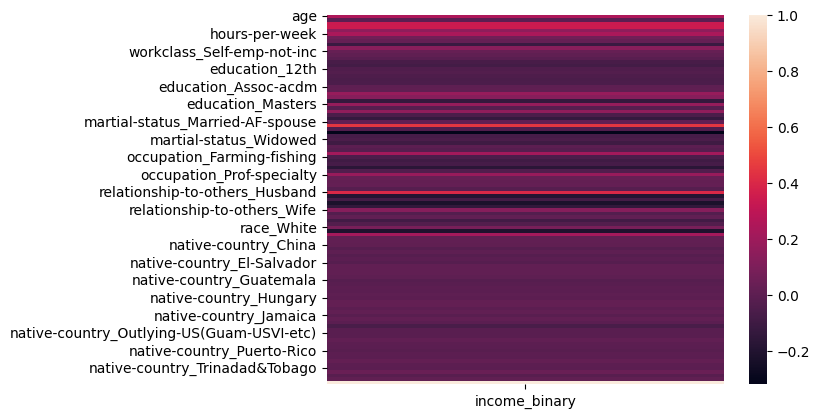

In [5]:
# check for class imbalance 
# there is some imbalance: the ratio is 22654 examples with incomes less than or equal to 50K and 7508 examples with incomes greater than 50K
# however, this imbalance is not too severe (no class is less than 5%) so I would not take any further action
# I will make sure to check metrics like roc auc score instead of accuracy to address this 
print(pd.value_counts(label))

# compare correlations for the dataset 
# first change the label to binary values
# 0 if the income is less than or equal to 50K and 1 if the income is greater than 50K
binary_label = pd.get_dummies(label, prefix='income')['income_>50K']

cleaned_features_and_label = features
cleaned_features_and_label['income_binary'] = binary_label
correlation_matrix = cleaned_features_and_label.corr()
sns.heatmap(correlation_matrix['income_binary'].to_frame()) #only take one column of the matrix 
# looking at the heatmap, I can see that there are some features that do not have a high correlation with the label and needs to be removed


# feature selection
#look at values of the correlations compared with the label
correlation_with_label = correlation_matrix['income_binary']
print(correlation_with_label.abs().sort_values())
# I will remove features that has correlation less than 0.1 (absolute value)
final_features = []
for feature in feature_columns:
    if abs(correlation_with_label[feature]) >= 0.1:
        final_features.append(feature)

print(final_features)
print(len(final_features))

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

I do have a new features list in the "final_features" variable that contains 25 features: ['age', 'years-education', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Private', 'workclass_Self-emp-inc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'martial-status_Divorced', 'martial-status_Married-civ-spouse', 'martial-status_Never-married', 'occupation_Exec-managerial', 'occupation_Other-service', 'occupation_Prof-specialty', 'relationship-to-others_Husband', 'relationship-to-others_Not-in-family', 'relationship-to-others_Own-child', 'relationship-to-others_Unmarried', 'relationship-to-others_Wife', 'sex_selfID_Female', 'sex_selfID_Non-Female']. Even though this may seem like a lot, it is actually a reduced list from the 104 features that resulted after data cleaning. 

The data preparation techniques that I used during data cleaning is replacing null values with the mean (for numeric values) and dropping rows with missing values (for non-numeric values). I also found and winsorized outliers, one hot encoded categorical variables, and checked for class imbalance. I also compared the correlation of the features with the label and I dropped the features that had correlations that have an absolute value less than 0.1. This is how I arrived at my final features list. After this, I would split my data into training and testing sets(also validation sets because I will use Grid Search to search for the best value for the hyperparameter C, which will do cross-validation and generate training and validation sets automatically from the training set I pass into the function). 

The model that I plan to use is logistic regression since I am working with binary classification. 

I would plan to train my model by using the Logistic Regression model from scikit-learn. I will mainly use roc-auc score to analyze the performance. This is because there is some imbalance in the data so that accuracy would not be a good metric. I will also try to improve the model by trying different values for the hyperparameter C to experiment with different levels of regulation using GridSearch. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
# YOUR CODE HERE

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(features[final_features], label, test_size=0.33,random_state=1234)

# creating different models with different values for the hyperparameter C
possible_c = [10**i for i in range(-5,5)]
param_grid = {'C':possible_c}
model = LogisticRegression()
grid = GridSearchCV(model, param_grid, cv=5, scoring = 'roc_auc')
grid_search = grid.fit(X_train, y_train)

best_c = grid_search.best_params_['C']
print(best_c)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

0.01


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
final_model = LogisticRegression(C=best_c)
final_model.fit(X_train, y_train)
probability_predictions = final_model.predict_proba(X_test)[:,-1]
auc_score = roc_auc_score(y_test, probability_predictions)
print(auc_score)
# The auc_score is about 0.87, which is pretty good because the score ranges from 0.5 to 1, with higher scores being better

0.8701619505082934


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
